<a href="https://colab.research.google.com/github/Quark-hadron/titanic_analysis/blob/main/ml_analis_titanik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1rARFwu51TeY68KhgOEiP_6CG696s6kdG/view?usp=sharing

In [ ]:
! gdown --id 1rARFwu51TeY68KhgOEiP_6CG696s6kdG

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rARFwu51TeY68KhgOEiP_6CG696s6kdG
To: /content/titanic_train.csv
100% 60.3k/60.3k [00:00<00:00, 8.15MB/s]


In [ ]:
! unzip /content/titanic_train.csv

Archive:  /content/titanic_train.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/titanic_train.csv or
        /content/titanic_train.csv.zip, and cannot find /content/titanic_train.csv.ZIP, period.


In [ ]:
import pandas as pd
from pandas import read_csv, DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm, cross_decomposition
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
import pylab as pl


In [ ]:
df = pd.read_csv('/content/titanic_train.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


заменим пустые значения в столбце Age на медиану(50%) для лучшей точности модели предсказания

In [ ]:
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
median = df['Age'].describe().loc['50%']
median

28.0

In [ ]:
df.loc[df.Age.isna(),'Age'] = median
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


поменяем тип данных из столбца Age на int64 т.к возраст не может быть типа float64

In [ ]:
df['Age'] = df['Age'].fillna(0).astype(dtype='int64')

Удалим выбросы с возростом слишком маленьким либо невозможным или слишком большим - анномальные значения признаков

In [ ]:
df['Age'].value_counts()
index_num_drop = df[df['Age'] == 0].index

In [ ]:
index_num_drop

Index([78, 305, 469, 644, 755, 803, 831], dtype='int64')

In [ ]:
df.drop(index_num_drop,inplace=True)

In [ ]:
ind = df[df['Age'] >= 100].index
ind

Index([], dtype='int64')

заменим пустые значения в столбце Cabin на наиболее часто встречающие для лучшей точности модели предсказания

In [ ]:
table_Cadin = df['Cabin'].value_counts().idxmax()
table_Cadin

'B96 B98'

In [ ]:
df.loc[df.Cabin.isna(),'Cabin'] = table_Cadin
df['Cabin']

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
...,...
886,B96 B98
887,B42
888,B96 B98
889,C148


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


количество женщин и мужчин на борту

In [ ]:
quantity = df['Sex'].value_counts()
quantity

,count
Sex,
male,572
female,312


распределение по всем классам

In [ ]:
df['Pclass'].value_counts().sort_index()

,count
Pclass,
1,215
2,181
3,488


распределение по мужчинам

In [ ]:
male = df.loc[df['Sex'] == 'male'].groupby('Pclass')['Sex'].value_counts()
male

,,count
Pclass,Sex,
1,male,121
2,male,105
3,male,346


распределение по женщинам

In [ ]:
female = df.loc[df['Sex'] == 'female'].groupby('Pclass')['Sex'].value_counts()
female

,,count
Pclass,Sex,
1,female,94
2,female,76
3,female,142


количество мужчин 2 класса

In [ ]:
male.loc[2]

,count
Sex,
male,105


проверим значения в столбце fare на NaN

In [ ]:
df['Fare'].isna().value_counts(dropna=False)

,count
Fare,
False,884


выведем стандартное отклонение для столбца fare и округлим его на два знака после запятой

In [ ]:
round(df['Fare'].std(),2)

49.71

выведем медиану для столбца fare и округлим его на два знака после запятой

In [ ]:
round(df['Fare'].median(),2)

14.45

графики зависимости признаков Age, Fare, Pclass, Sex, SibSp,
Parch, Embarked и Survived.

In [ ]:
plt.style.use('dark_background')

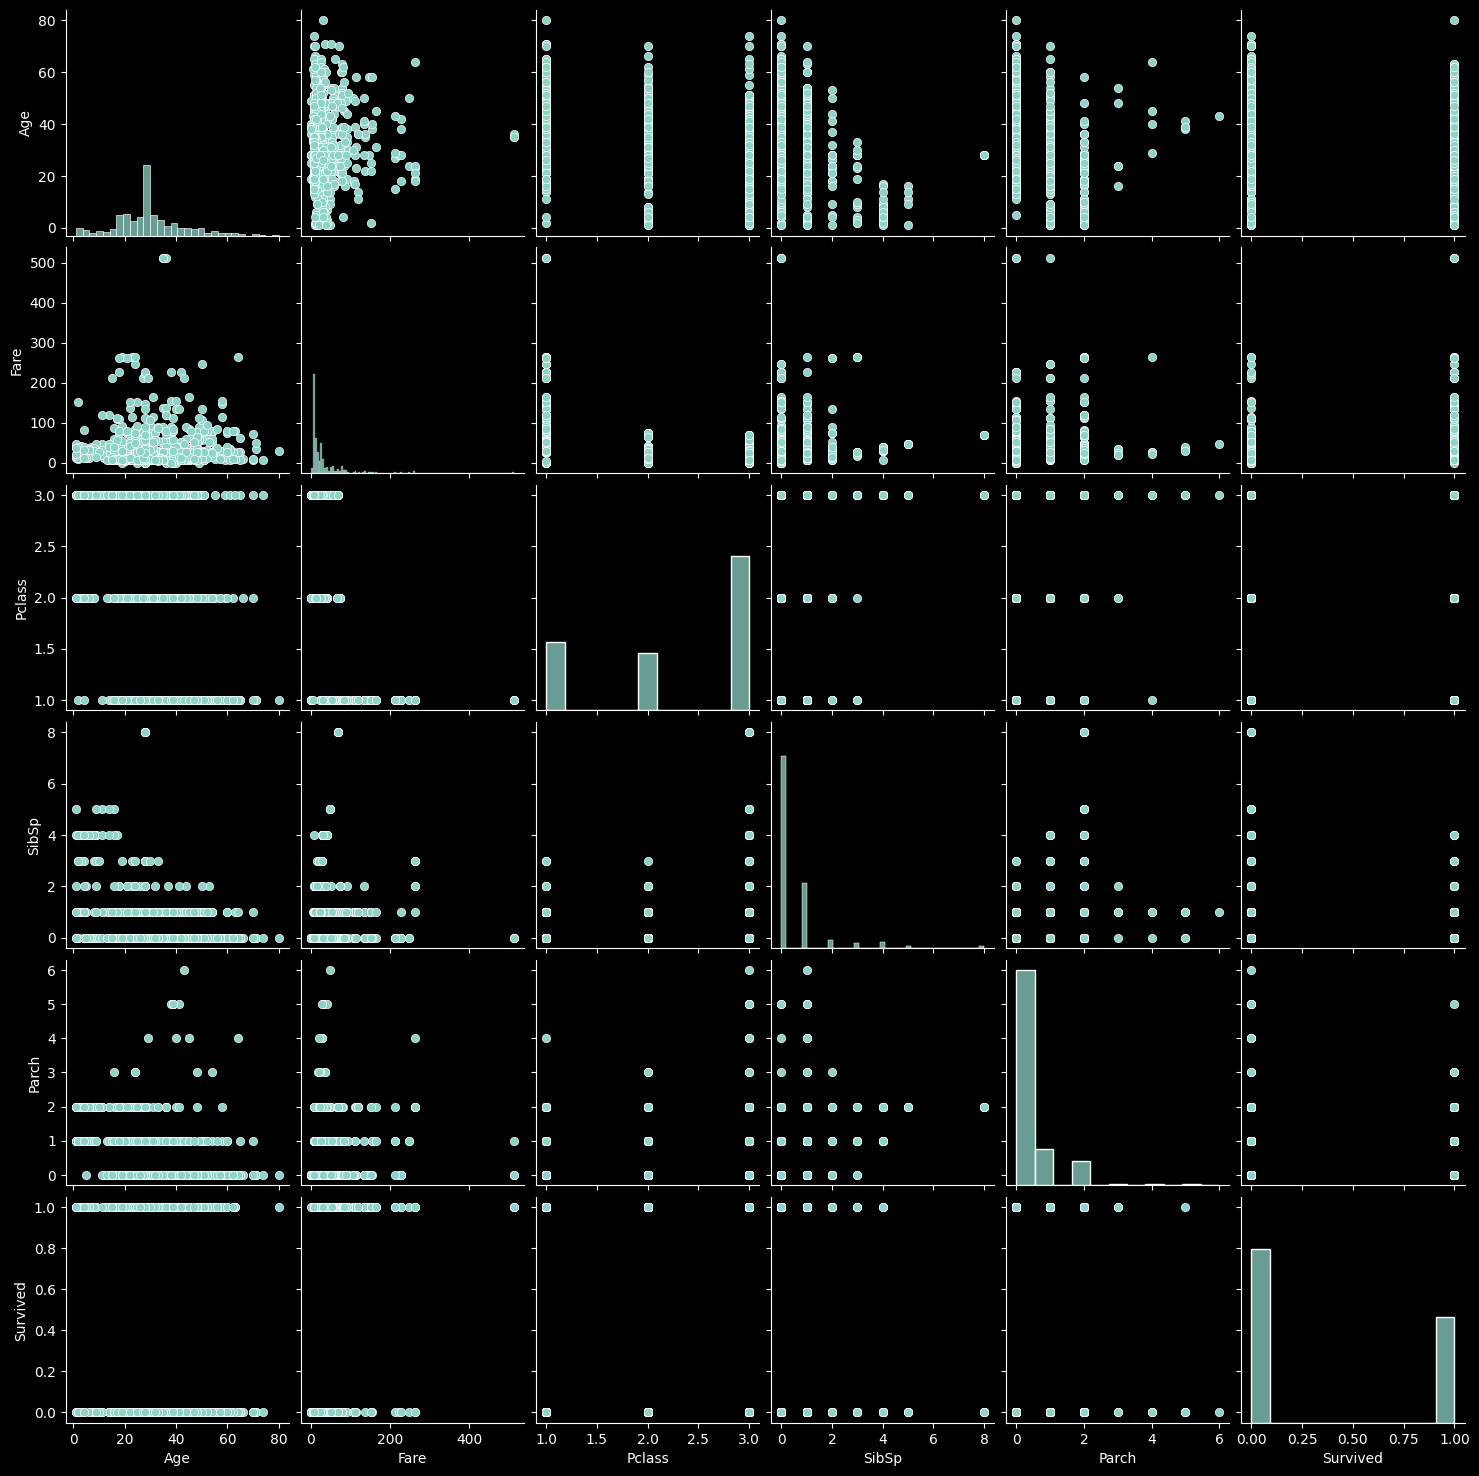

In [ ]:
cols = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked','Survived']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Survived', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='SibSp', ylabel='Fare'>,
        <Axes: xlabel='Parch', ylabel='Fare'>,
        <Axes: xlabel='Survived', ylabel='Fare'>],
       [<Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Survived', ylabel='Pclass'>],
       [<Axes: xlabel='Age', ylabel='SibSp'>,
        <Axes: xlabel='Fare', ylabel='SibSp'>,
        <Axes: xlabel='Pclass', ylabel='SibSp'>,


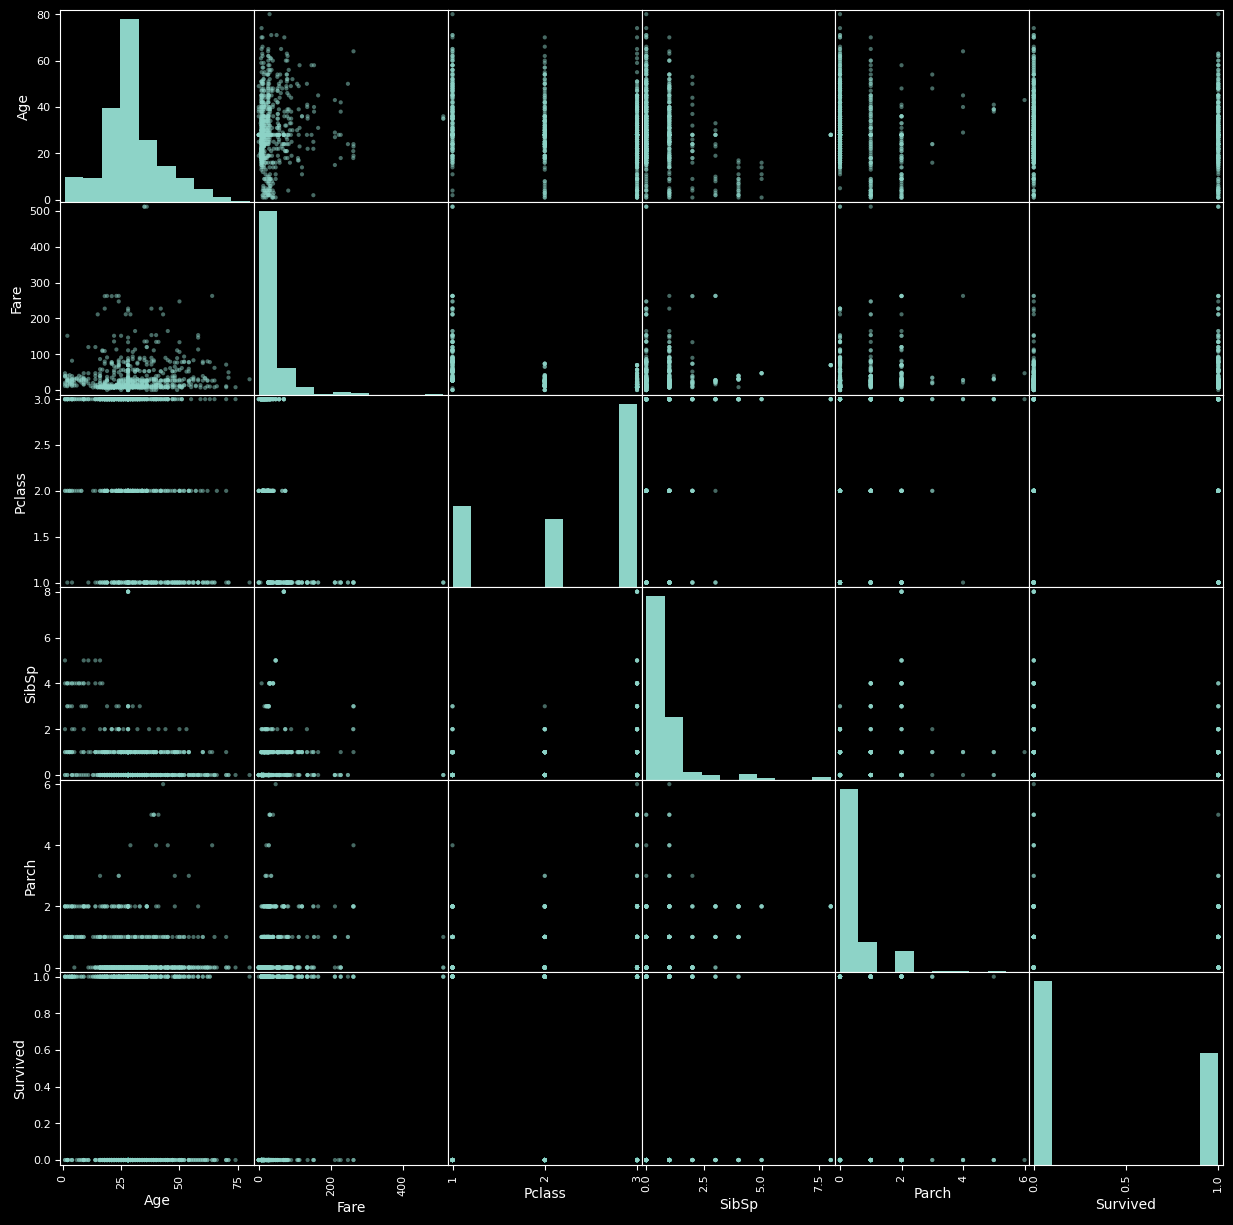

In [ ]:
pd.plotting.scatter_matrix(df[cols], figsize=(15, 15))

In [ ]:
num = df.describe()
num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,445.128959,0.378959,2.308824,29.578054,0.519231,0.374434,32.164158
std,257.123194,0.485403,0.837060,12.814011,1.104235,0.804195,49.712115
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,35.000000,1.000000,0.000000,31.068750
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='Frequency'>

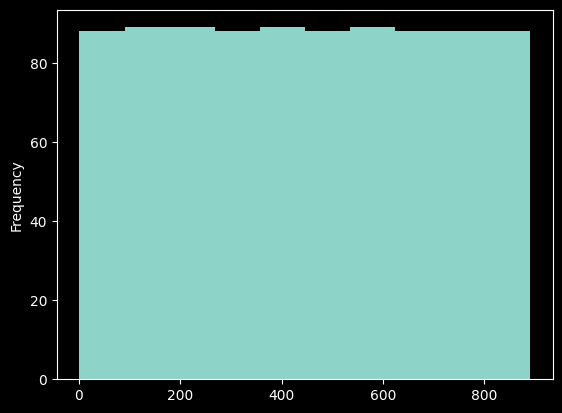

In [ ]:
df['PassengerId'].plot.hist()

<Axes: ylabel='Frequency'>

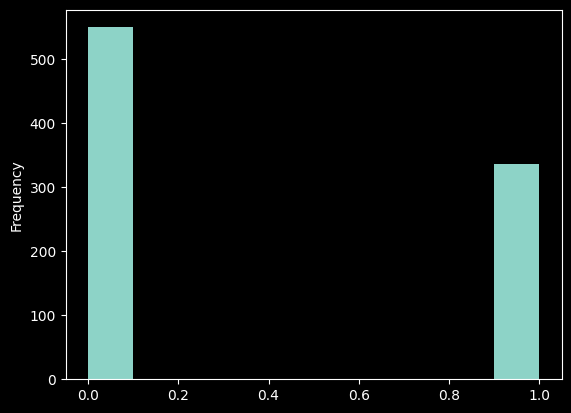

In [ ]:
df['Survived'].plot.hist()

<Axes: ylabel='Frequency'>

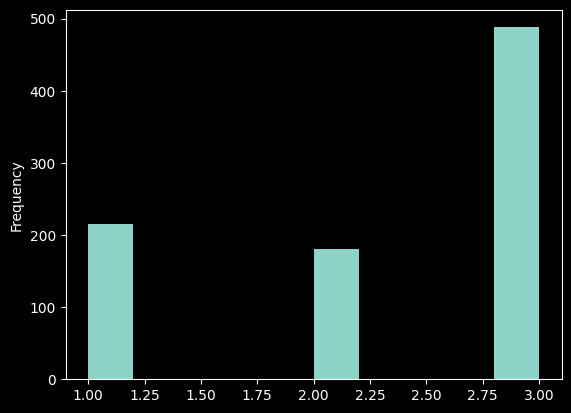

In [ ]:
df['Pclass'].plot.hist()

<Axes: ylabel='Frequency'>

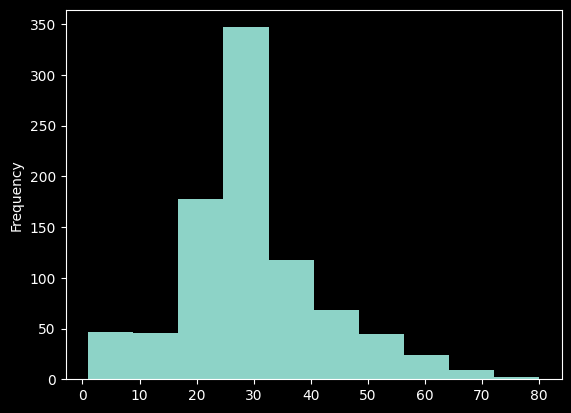

In [ ]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

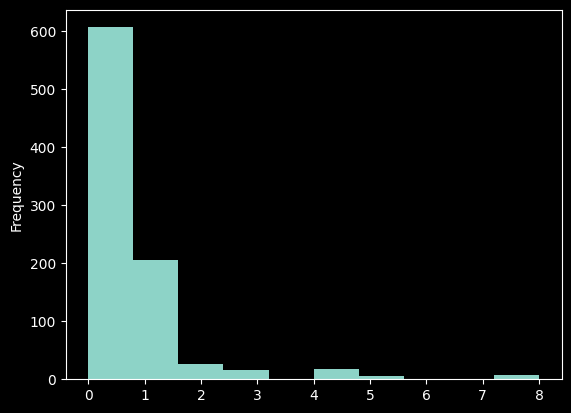

In [ ]:
df['SibSp'].plot.hist()

<Axes: ylabel='Frequency'>

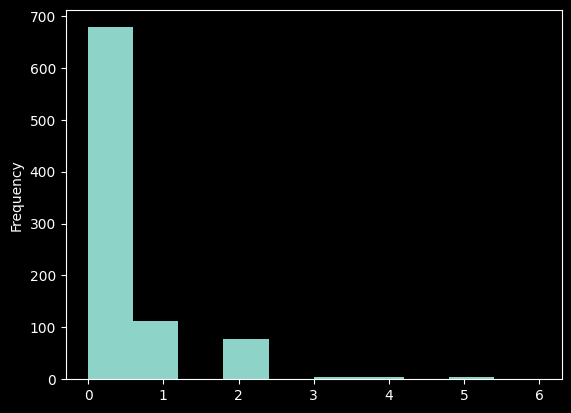

In [ ]:
df['Parch'].plot.hist()

<Axes: ylabel='Frequency'>

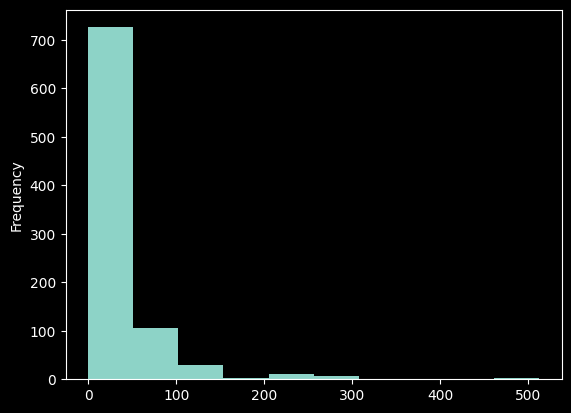

In [ ]:
df['Fare'].plot.hist()

In [ ]:
df['Fare'].loc[df['Fare'] == 0.0000] = df['Fare'].median()

<ipython-input-38-3698278d9510>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'].loc[df['Fare'] == 0.0000] = df['Fare'].median()


построим график Boxplot, который показывает где находятся 50% наших данных и мы видем, что все они сосредоточены в одном месте, так же мы можем наблюдать выбрасы этих признаков

<Axes: xlabel='Pclass', ylabel='Fare'>

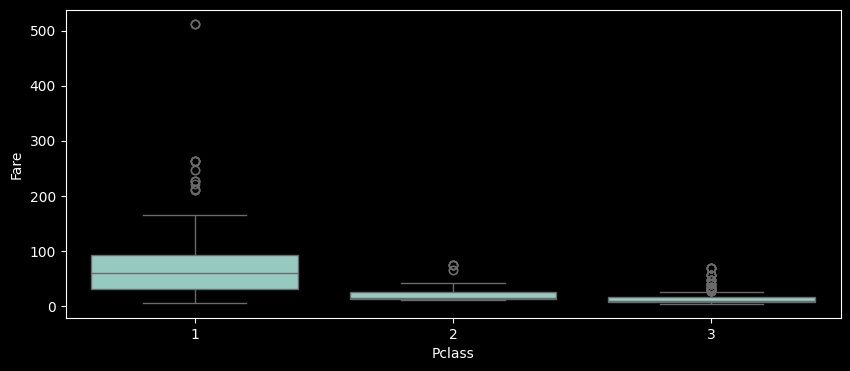

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x = 'Pclass', y = 'Fare',data = df)

мы видем, что между признаками Fare и Pclass прямая зависимость

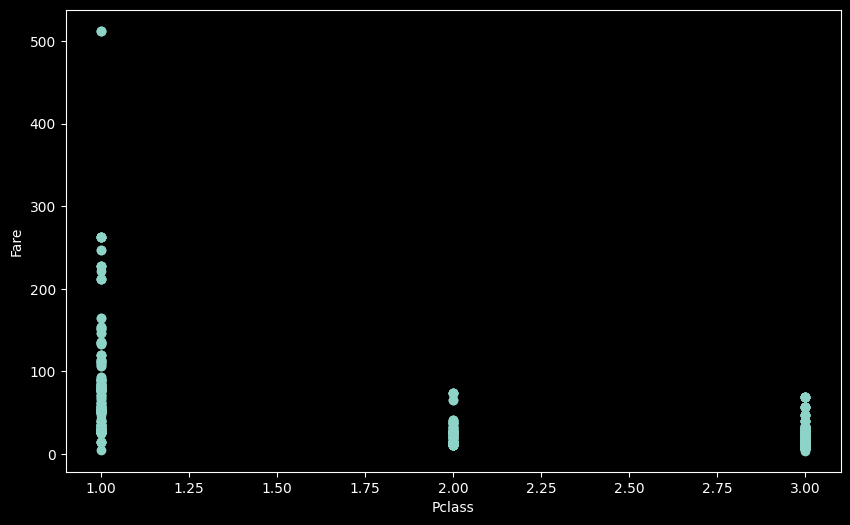

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Pclass'], y = df['Fare'])
plt.ylabel('Fare')
plt.xlabel('Pclass')
plt.show()

мы наблюдаем, то-что в 1 классе данные находятся выше среднего класса и соотвествено ниже 3 класса - это может значить только одно, что класс напрямую зависит от стоимости билета

In [ ]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,231
male,468,104


<Axes: xlabel='Sex', ylabel='count'>

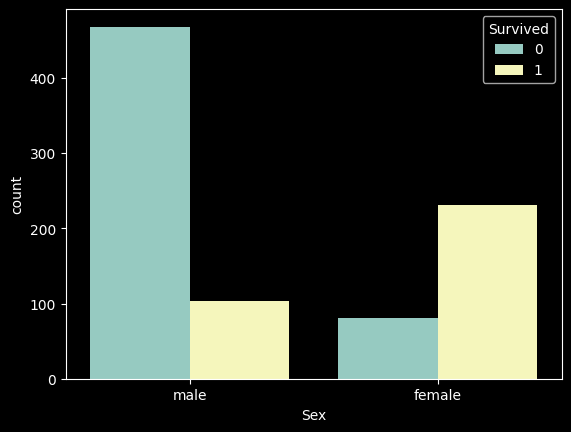

In [ ]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

мы можем видеть, что у женщин было больше шансов выжить, как показывает статистика выживаемость у женщин выше чем у мущин - это может быть связано с тем, что женщин и детей спасали первыми, а затем мущин

In [ ]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,135
2,97,84
3,372,116


<Axes: xlabel='Pclass', ylabel='count'>

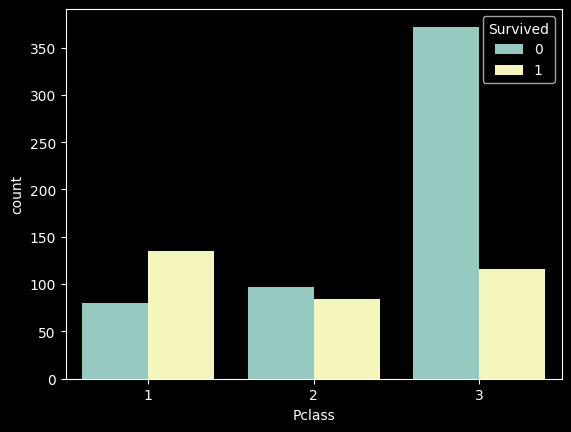

In [ ]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

здесь так же можно отметить, что выживаемость в каютах первого класса выше чем того же среднего или вообще низкого - это скорее всего связано с тем, что каюты первого класса были выше кают 3 класса, а как мы знаем любое водоходное судно тонет снизу вверх заполняя при этом равномерно корпус корабля, вторая же гипотиза связана с тем, что у людей, которые смогли позволить себе каюту 3 класса больше влияние на персанал судна из-за высокого соц-статуса

In [ ]:
pd.crosstab(df['Age'],df['Survived'])

Survived,0,1
Age,,
1,2,5
2,7,3
3,1,5
4,3,7
5,0,4
...,...,...
66,1,0
70,3,0
71,2,0


In [ ]:
young = df.loc[df['Age'] <= 30]
old_people = df.loc[df['Age'] >= 60]

In [ ]:
young

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,B96 B98,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,B96 B98,S
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,B96 B98,S


по тенденции этого графика мы видим, что молодые дествительно больше выживали, чем старики, причем, каждый возраст до 30 лет выжил, судя по графику, а вот у стариков с возраста: 64 - 74 не выжили вовсе некто, но на следуещем графике видно, что процент выживших среди людей старше 60 выше, чем до 30

<Axes: xlabel='Age', ylabel='count'>

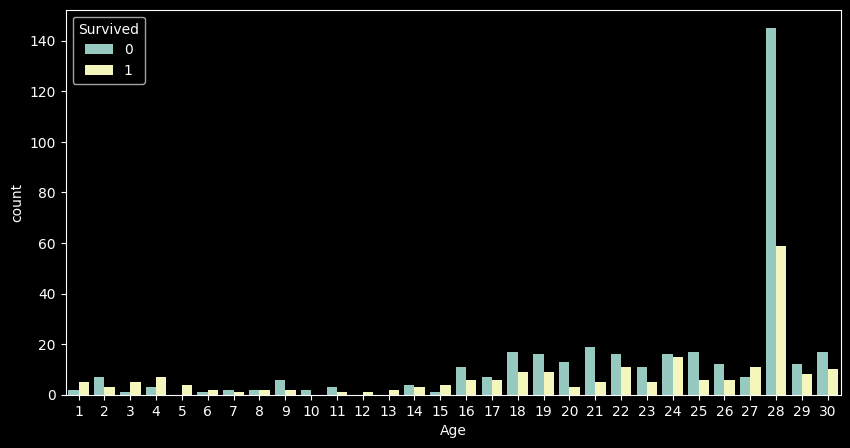

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Age', hue = 'Survived', data = young)

старики - 3   
молодые люди - 1

<Axes: xlabel='age', ylabel='count'>

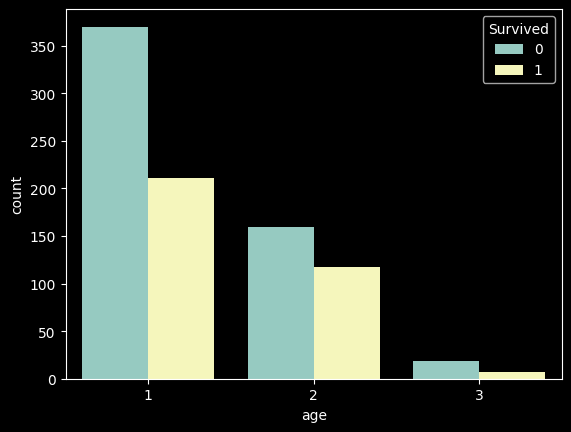

In [ ]:
df['age'] = df['Age'].apply(lambda x: 1 if x <= 30 else 3 if x >= 60 else 2)
sns.countplot(x='age', hue='Survived', data=df)

мы видем, что соотношение выживших к невыжившим у стариков меньше, чем у молодых людей, значит и процент у стариков среди выживших выше, чем у молодых

<Axes: xlabel='Age', ylabel='count'>

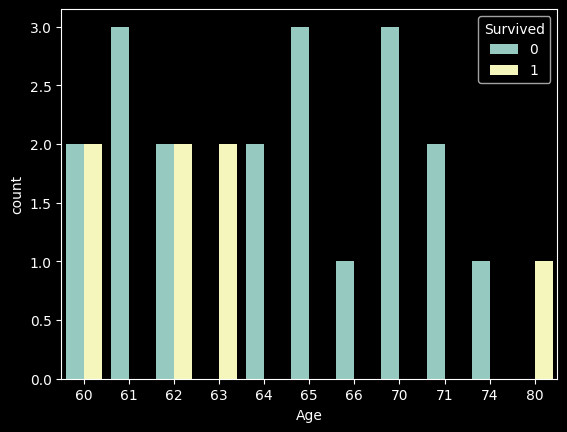

In [ ]:
sns.countplot(x = 'Age', hue = 'Survived', data = old_people)

соотвествено выживаемость сильно зависит от возраста людей оказавшихся на борту титаника, а имено - это обратная пропорциональность или что лучше всего описывает такое явление - это экспоненциальный рост, чем меньше возраст тем выживаемость у человека выше

In [ ]:
survived = df.loc[df['Survived'] == 1]
no_survive = df.loc[df['Survived'] == 0]

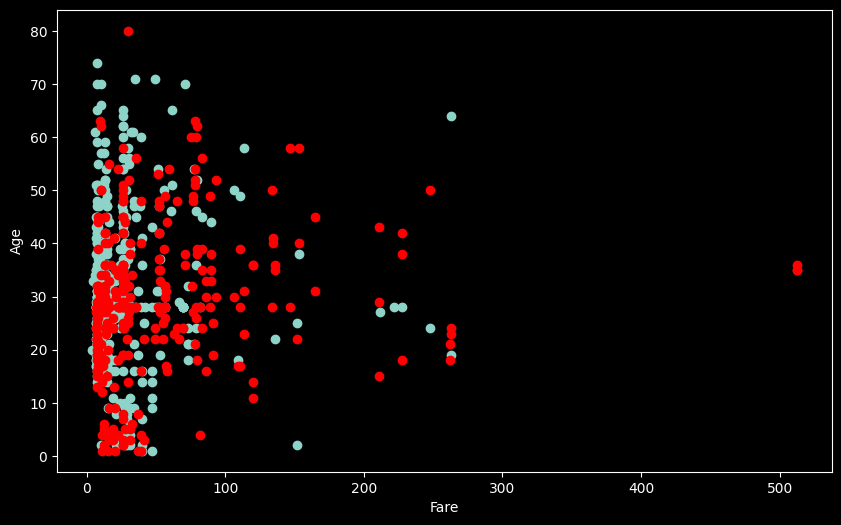

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = no_survive['Fare'], y = no_survive['Age'])
ax.scatter(x = survived['Fare'], y = survived['Age'],c='red')
plt.ylabel('Age')
plt.xlabel('Fare')
plt.show()

разбиваем выборку на тренировочную выборку и тестовую, спомощью метода simple random division, я думаю в данном примере - это наилучший врянт например cross-validation здесь не подойдет т.к слишком много данных

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,B96 B98,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1


График целевой переменной Survived

График распределения

<Axes: xlabel='Survived', ylabel='count'>

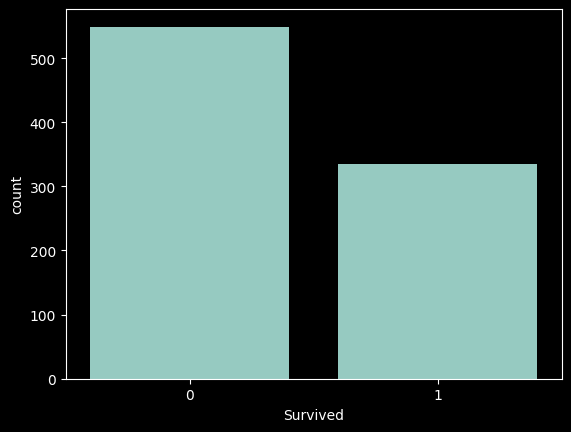

In [ ]:
sns.countplot(x='Survived', data=df)

График выживания в зависимости от пола

<Axes: xlabel='Survived', ylabel='count'>

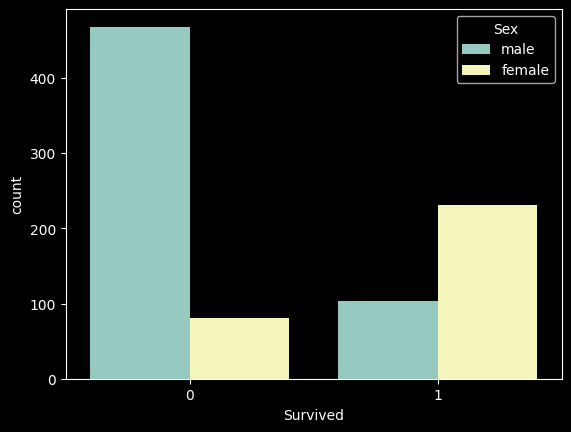

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)

График выживаемости в зависимости от класса

<Axes: xlabel='Pclass', ylabel='count'>

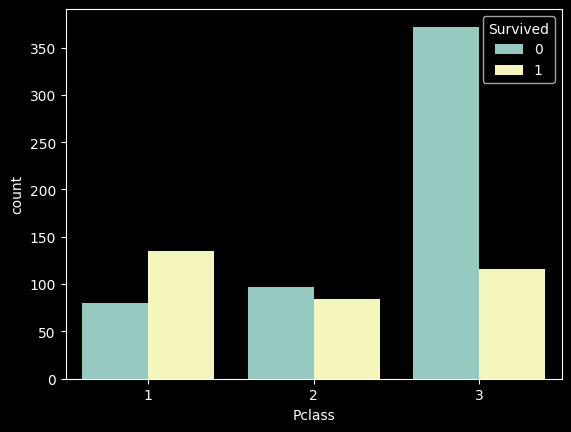

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [ ]:
df_corr = pd.DataFrame([df['PassengerId'],df['Survived'],df['Pclass'],df['Age'],df['SibSp'],df['Parch'],df['Fare']]).T
df_corr.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.009402,-0.037955,0.043032,-0.060358,-0.001532,0.017505
Survived,-0.009402,1.000000,-0.341319,-0.043452,-0.040023,0.071266,0.256314
Pclass,-0.037955,-0.341319,1.000000,-0.348512,0.082397,0.021500,-0.551690
Age,0.043032,-0.043452,-0.348512,1.000000,-0.230614,-0.156862,0.101992
SibSp,-0.060358,-0.040023,0.082397,-0.230614,1.000000,0.415923,0.158339
Parch,-0.001532,0.071266,0.021500,-0.156862,0.415923,1.000000,0.212675
Fare,0.017505,0.256314,-0.551690,0.101992,0.158339,0.212675,1.000000


<Axes: >

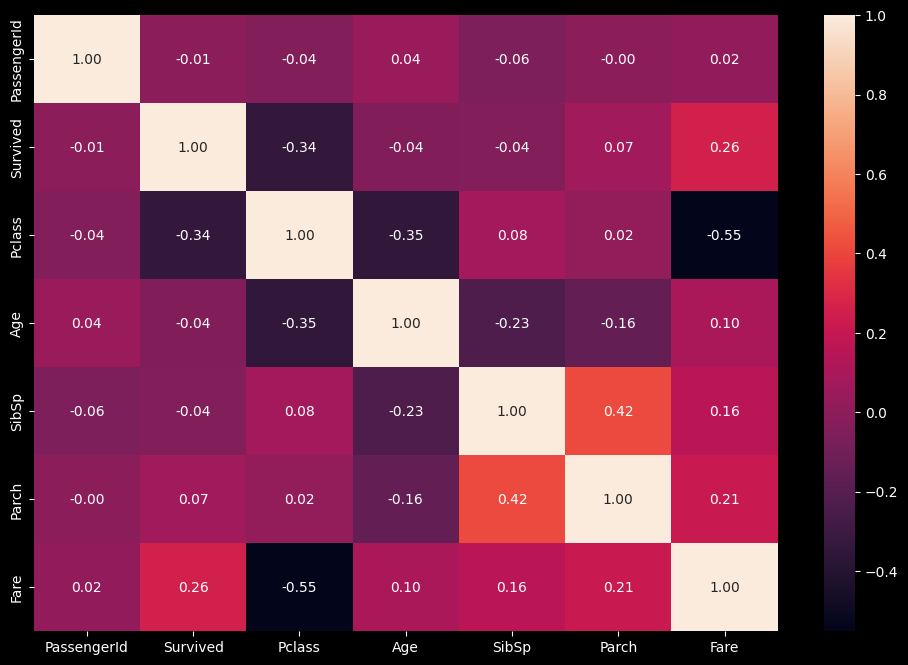

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f')

In [ ]:
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId','Sex','Embarked','age'])
y = df['Survived']

In [ ]:
df_train_X, df_test_X, df_train_Y, df_test_Y = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Support Vector Classifier': SVC()
}

best_model = None
best_accuracy = 0

укажем значения для каждого признака

In [ ]:
sample_passenger = pd.DataFrame({
    'Pclass': [1],
    'Age': [24],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [30]
})


In [ ]:
for model_name, model in models.items():
    model.fit(df_train_X, df_train_Y)
    y_pred = model.predict(df_test_X)
    accuracy = accuracy_score(df_test_Y, y_pred)
    print(f"{model_name} - Accuracy: {accuracy: .4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_m = model
        survived_prediction = best_m.predict(sample_passenger)

print(f"Best model: {best_m} -  accuracy: {best_accuracy: .4f}")

Random Forest - Accuracy:  0.6833
Logistic Regression - Accuracy:  0.6878
Support Vector Classifier - Accuracy:  0.6787
Best model: LogisticRegression(max_iter=200) -  accuracy:  0.6878


In [ ]:
best_m

LogisticRegression(max_iter=200)

мы видим, что метод случайных лесов здесь подходит лучше всего, значит для предсказания Survived будем использовать его

In [ ]:
print(f'Survived prediction for the sample passenger: {survived_prediction[0]}')

Survived prediction for the sample passenger: 1
